<a href="https://colab.research.google.com/github/HarikrishnanK9/Tomato_Leaf_Disease_Detection/blob/main/Copy_of_Tomato_Leaf_CNN_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Load the Dataset

In [ ]:
!cp '/content/drive/MyDrive/Tomato_Leaf/TomatoX.zip' '/content'

In [ ]:
!unzip TomatoX.zip

#Importing Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [ ]:
input_shape = (256,256,3)
num_classes = 11
batch_size = 32
epochs = 10

# Model1:
* 4 hidden layers

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=40,           # Degree range for random rotations
    width_shift_range=0.2,       # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,      # Fraction of total height for random vertical shifts
    shear_range=0.2,             # Shear intensity (shear angle in radians)
    zoom_range=0.2,              # Range for random zoom
    horizontal_flip=True,        # Randomly flip inputs horizontally
    vertical_flip=True           # Randomly flip inputs vertically
)


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='categorical')



Found 25851 images belonging to 11 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        '/content/valid',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='categorical')



Found 6683 images belonging to 11 classes.


#Data Visualization

In [ ]:
num_images_to_display = 5
category_names = {
    0: 'Bacterial_spot',
    1: 'Early_blight',
    2: 'Late_blight',
    3: 'Leaf_Mold',
    4: 'Septoria_leaf_spot',
    5: 'Spider_mites Two-spotted_spider_mite',
    6: 'Target_Spot',
    7: 'Tomato_Yellow_Leaf_Curl_Virus',
    8: 'Tomato_mosaic_virus',
    9: 'healthy',
    10: 'powdery_mildew'
}

# Extract images from the data generator for each category
category_images = {}
for category in category_names:
    images, _ = train_generator.next()
    category_images[category] = images

# Calculate the number of categories
num_categories = len(category_names)

# Display the images
plt.figure(figsize=(10, 2 * num_categories))  # Increase the width of the figure
for i in range(num_images_to_display):
    for category in category_names:
        plt.subplot(num_categories, num_images_to_display, category * num_images_to_display + i + 1)
        plt.imshow(category_images[category][i])
        plt.title(category_names[category])

plt.tight_layout()
plt.show()


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
807/807 [==============================] - 520s 628ms/step - loss: 1.6128 - accuracy: 0.4184 - val_loss: 1.2646 - val_accuracy: 0.5718
Epoch 2/10
807/807 [==============================] - 513s 636ms/step - loss: 1.0304 - accuracy: 0.6413 - val_loss: 0.9987 - val_accuracy: 0.6605
Epoch 3/10
807/807 [==============================] - 533s 660ms/step - loss: 0.8506 - accuracy: 0.7067 - val_loss: 0.9162 - val_accuracy: 0.7398
Epoch 4/10
807/807 [==============================] - 509s 631ms/step - loss: 0.7410 - accuracy: 0.7437 - val_loss: 0.9798 - val_accuracy: 0.7336
Epoch 5/10
807/807 [==============================] - 516s 638ms/step - loss: 0.6687 - accuracy: 0.7686 - val_loss: 0.7077 - val_accuracy: 0.7832
Epoch 6/10
807/807 [==============================] - 521s 645ms/step - loss: 0.6291 - accuracy: 0.7839 - val_loss: 0.5798 - val_accuracy: 0.8069
Epoch 7/10
807/807 [==============================] - 521s 645ms/step - loss: 0.5872 - accuracy: 0.7984 - val_loss: 0.5682 -

In [ ]:
# Save the trained model for later use
model.save('tomato_leaf_classifier_X_new_new1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/tomato_leaf_classifier_X_new_new1.h5' '/content/drive/MyDrive/Tomato_Leaf'

In [ ]:
# !cp '/content/drive/MyDrive/Tomato_Leaf/tomato_leaf_classifier_X.h5' '/content'

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(image_path): #
    img = image.load_img(image_path,target_size = input_shape) #
    img = image.img_to_array(img) #converting to array
    img = np.expand_dims(img,axis=0)  #expanding dims to match for model
    img /=255.0 #normalize
    prediction = model.predict(img)
    predicted_leaf_index = np.argmax(prediction)

    return predicted_leaf_index

In [ ]:
img = '/content/train/healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG'

In [ ]:
# Dictionary mapping species indices to species names
species_mapping = {
    0: 'Bacterial_spot',
    1: 'Early_blight',
    2: 'Late_blight',
    3: 'Leaf_Mold',
    4: 'Septoria_leaf_spot',
    5: 'Spider_mites Two-spotted_spider_mite',
    6: 'Target_Spot',
    7: 'Tomato_Yellow_Leaf_Curl_Virus',
    8: 'Tomato_mosaic_virus',
    9: 'healthy',
   10: 'powdery_mildew'
}

# Example usage to identify the species from the predicted index
predicted_condition_index = predict_image(img)  # Replace this with the actual predicted index
predicted_condition_name = species_mapping.get(predicted_condition_index, 'Unknown Species')

print(f'Predicted species: {predicted_condition_name}')


1/1 [==============================] - 0s 361ms/step
Predicted species: healthy


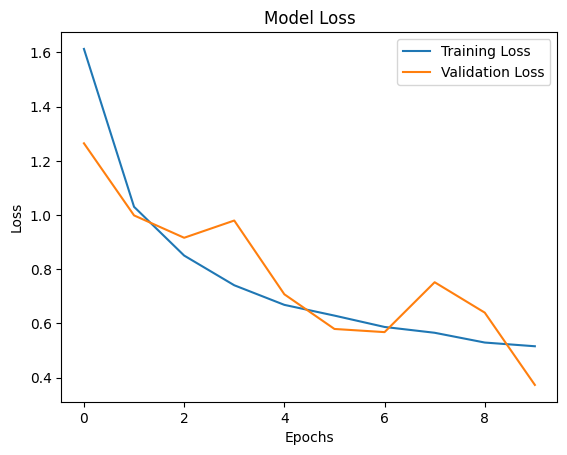

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


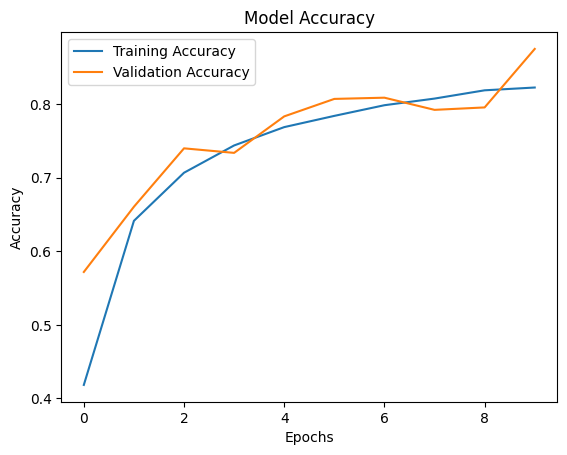

In [ ]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Model2:
* vgg16(13 convolutional layers+ 3 fully connected layers)

In [ ]:
model2 = Sequential()

# Block 1
model2.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 5
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(11, activation='softmax'))  # Output layer for binary classification


In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history2 = model2.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
807/807 [==============================] - 709s 847ms/step - loss: 2.3686 - accuracy: 0.1172 - val_loss: 2.3559 - val_accuracy: 0.1188
Epoch 2/10
807/807 [==============================] - 661s 819ms/step - loss: 2.3607 - accuracy: 0.1160 - val_loss: 2.3577 - val_accuracy: 0.1187
Epoch 3/10
807/807 [==============================] - 668s 828ms/step - loss: 2.3602 - accuracy: 0.1178 - val_loss: 2.3566 - val_accuracy: 0.1185
Epoch 4/10
807/807 [==============================] - 660s 818ms/step - loss: 2.3601 - accuracy: 0.1172 - val_loss: 2.3559 - val_accuracy: 0.1187
Epoch 5/10
807/807 [==============================] - 670s 830ms/step - loss: 2.3600 - accuracy: 0.1213 - val_loss: 2.3555 - val_accuracy: 0.1184
Epoch 6/10
807/807 [==============================] - 674s 835ms/step - loss: 2.3596 - accuracy: 0.1201 - val_loss: 2.3563 - val_accuracy: 0.1206
Epoch 7/10
807/807 [==============================] - 672s 833ms/step - loss: 2.3597 - accuracy: 0.1202 - val_loss: 2.3576 -

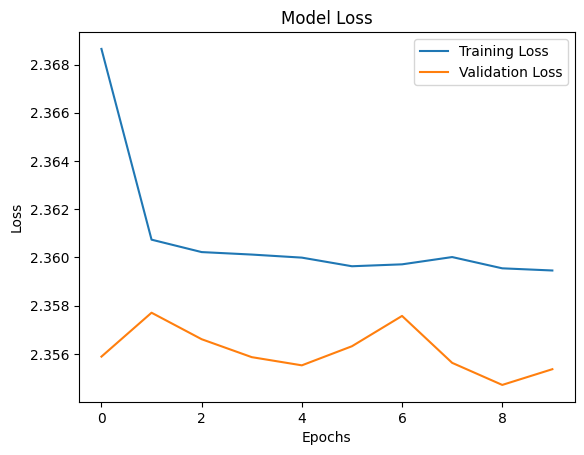

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history2.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


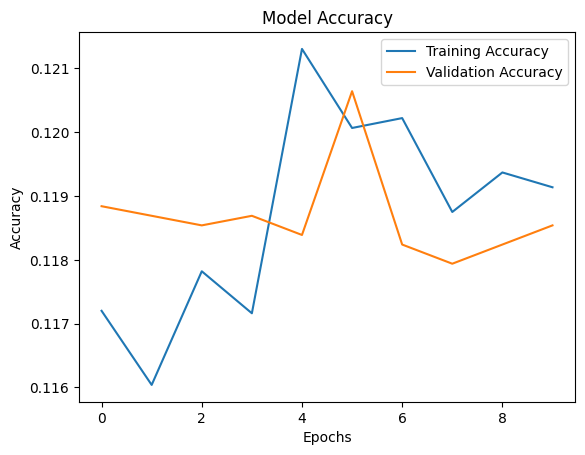

In [ ]:

# Plotting training accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Model3

Modifying 1st model by Implementing Batch Normalization and Global Average Pooling

In [ ]:
from keras.layers import GlobalAveragePooling2D, BatchNormalization

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(GlobalAveragePooling2D())
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))


In [ ]:

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])  # Pass the EarlyStopping callback to the 'callbacks' parameter


Epoch 1/20
807/807 [==============================] - 523s 643ms/step - loss: 1.3611 - accuracy: 0.5711 - val_loss: 1.4624 - val_accuracy: 0.5580
Epoch 2/20
807/807 [==============================] - 506s 627ms/step - loss: 0.8499 - accuracy: 0.7130 - val_loss: 1.3000 - val_accuracy: 0.6190
Epoch 3/20
807/807 [==============================] - 524s 650ms/step - loss: 0.7180 - accuracy: 0.7567 - val_loss: 1.6054 - val_accuracy: 0.5328
Epoch 4/20
807/807 [==============================] - 504s 625ms/step - loss: 0.6058 - accuracy: 0.7935 - val_loss: 1.9553 - val_accuracy: 0.6187
Epoch 5/20
807/807 [==============================] - 503s 624ms/step - loss: 0.5444 - accuracy: 0.8144 - val_loss: 1.2181 - val_accuracy: 0.6264
Epoch 6/20
807/807 [==============================] - 509s 631ms/step - loss: 0.4934 - accuracy: 0.8342 - val_loss: 1.6089 - val_accuracy: 0.6224
Epoch 7/20
807/807 [==============================] - 508s 629ms/step - loss: 0.4499 - accuracy: 0.8462 - val_loss: 0.9894 -

In [ ]:
model3.save('tomato_leaf_classifier_X_new_new2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/tomato_leaf_classifier_X_new_new2.h5' '/content/drive/MyDrive/Tomato_Leaf'

cp: cannot create regular file '/content/drive/MyDrive/Tomato_Leaf': No such file or directory


In [ ]:

from keras.layers import  BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
